## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
# kita cek ada missing data atau ga
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# describe buat liat statistical analysis
df.describe().transpose()

# liatnya susah
# jadi lebih enak di visualize

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.654900e-02  0.000000e+00   
view           21597.0  2.342918e-01  7.663898e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
sqft_basement  21597.0  2.917250e+02  4.426678e+02  0.000000e+00   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  8.446479e+01  4.018214e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

/Users/clcx/miniforge3/envs/tf-arm64/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

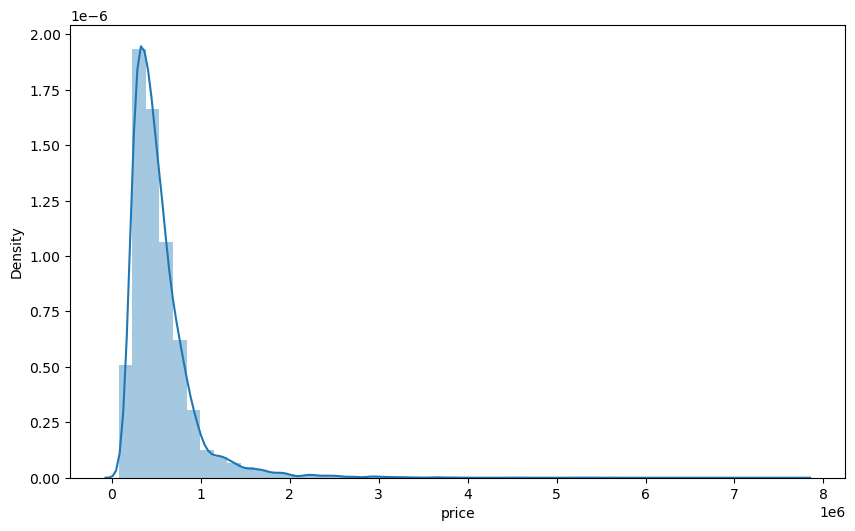

In [5]:
# continuous label pake distribution plot
plt.figure(figsize=(10,6),dpi=100)
sns.distplot(df['price'])

jadi disini kita bisa liat range harga rumahnya 0-2 million, kita plot biar bisa cek ada ga outliers yang misal kalo ada tbtb ada rumah yg mahal sendiri harganya 7 million, jadi kalo training data kita ada outliers kurang akurat nanti hasilnya soalnya kita predictnya cuma di range 0-2 mill

/Users/clcx/miniforge3/envs/tf-arm64/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

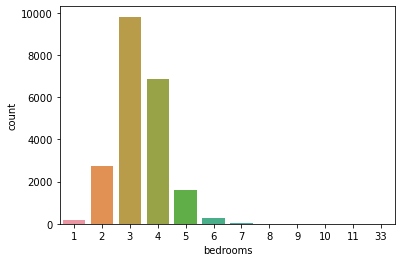

In [6]:
# categorical label pake countplot
sns.countplot(df['bedrooms'])

di atas ada outliers 8-33 itu pasti ada 1 atau bbrp tapi saking dikitnya jadi ga keliatan

In [7]:
# skrg kita coba liat correlation dalem data nya
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.002727  0.266398 -0.006834   0.063744     0.103854  0.021632   
view           0.011536  0.397370  0.080008   0.188386     0.284709  0.074900   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.005193  0.323799  0.302808   0.283440     0.435130  0.015418   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.016925  0.126424  0.018389   0.050544     0.055308  0.007686   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.002727  0.011536  -0.023803  0.008188   
price          0.256804    0.266398  0.397370   0.036056  0.667951   
bedrooms       0.177944   -0.006834  0.080008   0.026496  0.356563   
bathrooms      0.502582    0.063744  0.188386  -0.126479  0.665838   
sqft_living    0.353953    0.103854  0.284709  -0.059445  0.762779   
sqft_lot      -0.004814    0.021632  0.074900  -0.008830  0.114731   
floors         1.000000    0.023755  0.028814  -0.264075  0.458794   
waterfront     0.023755    1.000000  0.401971   0.016611  0.082888   
view           0.028814    0.401971  1.000000   0.045999  0.251728   
condition     -0.264075    0.016611  0.045999   1.000000 -0.146896   
grade          0.458794    0.082888  0.251728  -0.146896  1.000000   
sqft_above     0.523989    0.072109  0.167609  -0.158904  0.756073   
sqft_basement -0.245715    0.080559  0.277078   0.173849  0.168220   
yr_built       0.489193   -0.026153 -0.053636  -0.361592  0.447865   
yr_renovated   0.006427    0.092873  0.103951  -0.060788  0.014261   
zipcode       -0.059541    0.030272  0.084622   0.002888 -0.185771   
lat            0.049239   -0.014306  0.005871  -0.015102  0.113575   
long           0.125943   -0.041904 -0.078107  -0.105877  0.200341   
sqft_living15  0.280102    0.086507  0.280681  -0.093072  0.713867   
sqft_lot15    -0.010722    0.030781  0.072904  -0.003126  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799      -0.005193  0.021617     -0.016925 -0.008211   
price            0.605368       0.323799  0.053953      0.126424 -0.053402   
bedrooms         0.479386       0.302808  0.155670      0.018389 -0.154092   
bathrooms        0.686668       0.283440  0.507173      0.050544 -0.204786   
sqft_living      0.876448       0.435130  0.318152      0.055308 -0.199802   
sqft_lot         0.184139       0.015418  0.052946      0.007686 -0.129586   
floors           0.523989      -0.245715  0.489193      0.006427 -0.059541   
waterfront       0.072109       0.080559 -0.026153      0.092873  0.030272   
view             0.167609       0.277078 -0.053636      0.103951  0.084622   
condition       -0.158904       0.173849 -0.361592     -0.060788  0.

In [8]:
# coba lebih specific
# kita liat yg correlating sama pricenya
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

udah pasti price korelasi nya 100%, tp kita bisa liat kayak sqft_living, bedrooms, bathroom dll juga korelasi sama harga rumahnya

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

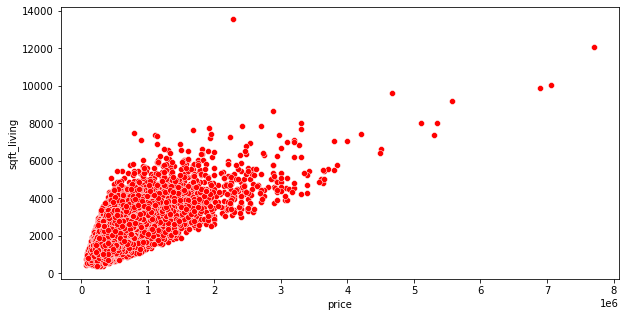

In [9]:
# kita coba plot korelasi sqft_living sama price
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df,color='red')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

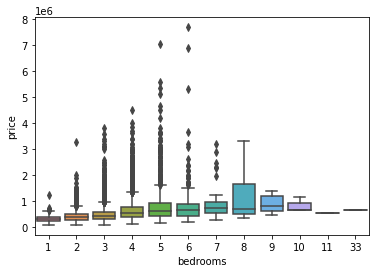

In [10]:
# skrg correlation bedrooms sama price
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

skrg kita liat harga rumah berdasarkan latitude(garis lintang) dan longitude (garis bujur)nya

In [11]:
df[['long','lat']]

long      lat
0     -122.257  47.5112
1     -122.319  47.7210
2     -122.233  47.7379
3     -122.393  47.5208
4     -122.045  47.6168
...        ...      ...
21592 -122.346  47.6993
21593 -122.362  47.5107
21594 -122.299  47.5944
21595 -122.069  47.5345
21596 -122.299  47.5941

[21597 rows x 2 columns]

<AxesSubplot:xlabel='price', ylabel='long'>

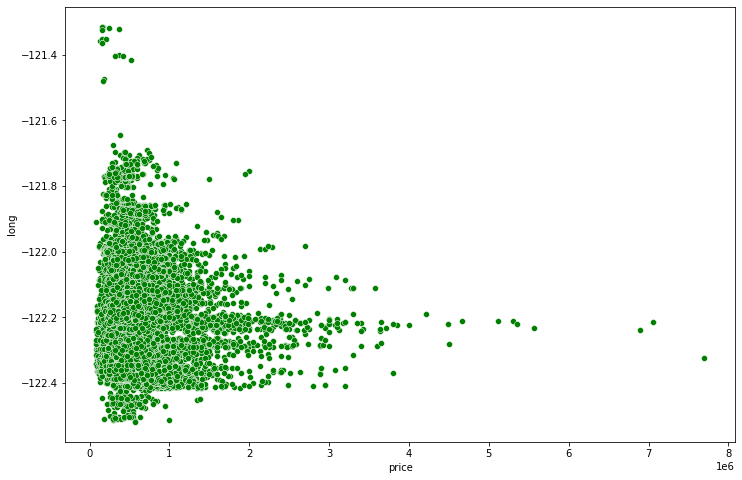

In [12]:
# ga berkorelasi
# TAPI di longitude sekitar -122.2 situ daerah orang kaya
# harga rumah mahal disitu
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df,color='green')

<AxesSubplot:xlabel='price', ylabel='lat'>

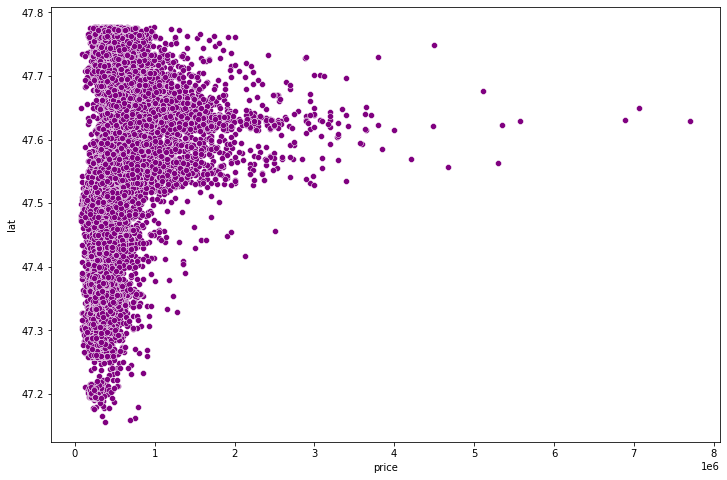

In [13]:
# sama ga berkorelasi
# tapi di lat tertentu itu daerah rumah orang kaya
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df,color='purple')

ini gambar peta seatle
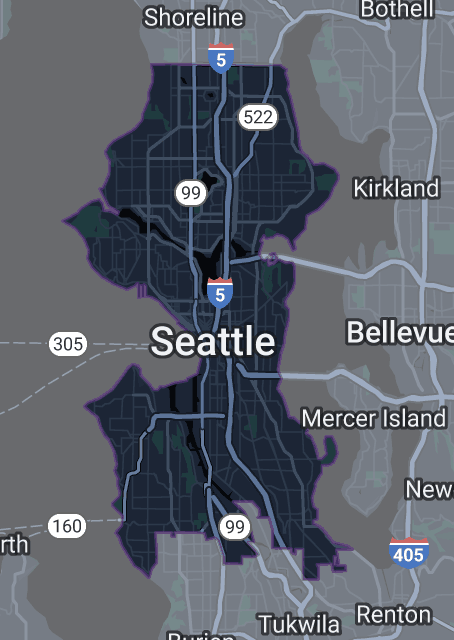
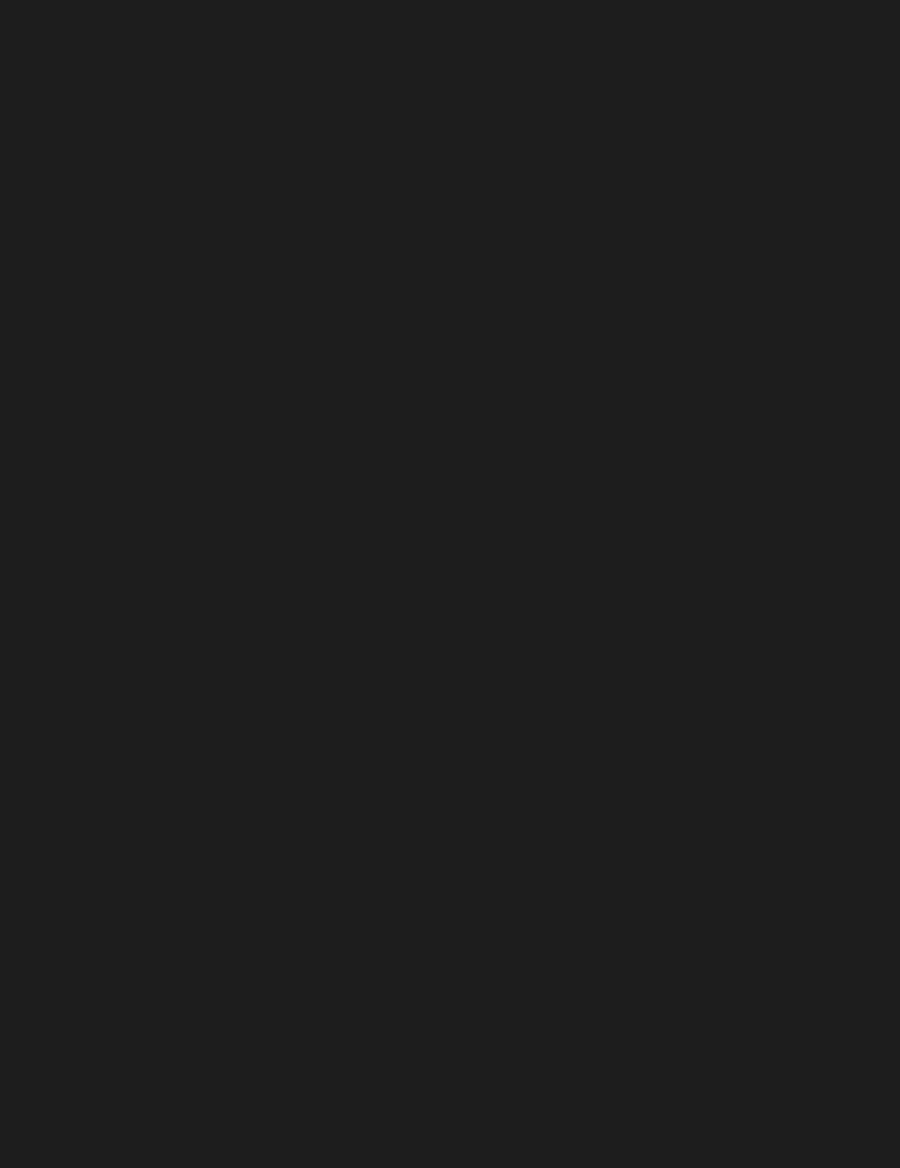

<AxesSubplot:xlabel='long', ylabel='lat'>

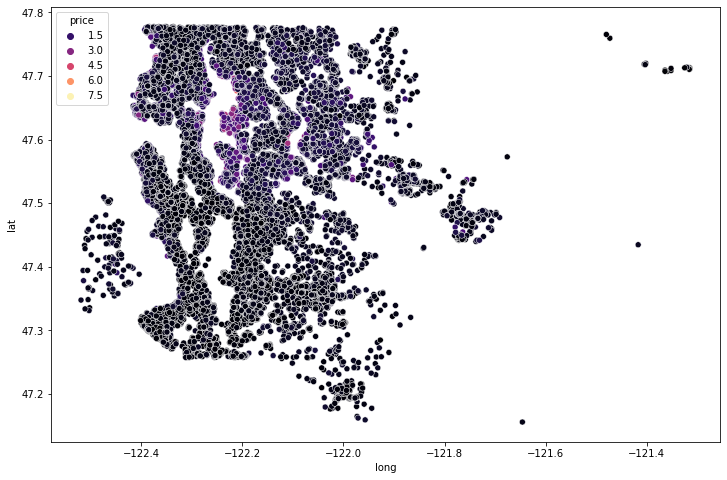

In [14]:
# kita skrg coba plot semua rumah di dataset kita berdasarkan long lat nya
# pasti ngebentuk kota seattle kurang lebih
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='magma')

kurang jelas soalnya ada outliers, jadi rangenya kejauan yang di atas, jadi kita coba hilangin yg harga2 nya terlalu tinggu dlu

In [15]:
# kita coba liat 20 harga tertinggi
df.sort_values('price',ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
1313   7558700030   4/13/2015  5300000.0         6       6.00         7390   
1162   1247600105  10/20/2014  5110000.0         5       5.25         8010   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
2624   7738500731   8/15/2014  4500000.0         5       5.50         6640   
8629   3835500195   6/18/2014  4490000.0         4       3.00         6430   
12358  6065300370    5/6/2015  4210000.0         5       6.00         7440   
4145   6447300265  10/14/2014  4000000.0         4       5.50         7080   
2083   8106100105  11/14/2014  3850000.0         4       4.25         5770   
7028    853200010    7/1/2014  3800000.0         5       5.50         7050   
19002  2303900100   9/11/2014  3800000.0         3       4.25         5510   
16288  7397300170   5/30/2014  3710000.0         4       3.50         5550   
18467  4389201095   5/11/2015  3650000.0         5       3.75         5020   
6502   4217402115   4/21/2015  3650000.0         6       4.75         5480   
15241  2425049063   9/11/2014  3640000.0         4       3.25         4830   
19133  3625049042  10/11/2014  3640000.0         5       6.00         5490   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600     2.5           0     3  ...     13        8570   
3910      37325     2.0           1     2  ...     11        7680   
9245      31374     2.0           0     4  ...     13        8860   
4407      35069     2.0           0     0  ...     13        6200   
1446      23985     2.0           0     4  ...     12        6720   
1313      24829     2.0           1     4  ...     12        5000   
1162      45517     2.0           1     4  ...     12        5990   
8085      13068     1.0           1     4  ...     12        4820   
2624      40014     2.0           1     4  ...     12        6350   
8629      27517     2.0           0     0  ...     12        6430   
12358     21540     2.0           0     0  ...     12        5550   
4145      16573     2.0           0     0  ...     12        5760   
2083      21300     2.0           1     4  ...     11        5770   
7028      42840     1.0           0     2  ...     13        4320   
19002     35000     2.0           0     4  ...     13        4910   
16288     28078     2.0           0     2  ...     12        3350   
18467      8694     2.0           0     1  ...     12        3970   
6502      19401     1.5           1     4  ...     11        3910   
15241     22257     2.0           1     4  ...     11        4830   
19133     19897     2.0           0     0  ...     12        5490   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245            3480      1910          1987    98102  47.6298 -122.323   
3910            2360      1940          2001    98004  47.6500 -122.214   
9245            1030      2001             0    98039  47.6305 -122.240   
4407            3000      2001             0    98039  47.6289 -122.233   
1446            1280      2009             0    98004  47.6232 -122.220   
1313            2390      1991             0    98040  47.5631 -122.210   
1162            2020      1999             0    98033  47.6767 -122.211   
8085            4820      1983          2009    98040  47.5570 -122.210   
2624             290      2004             0    98155  47.7493 -122.280   
8629               0      2001             0    98004  47.6208 -122.219   
12358           1890      2003             0    98006  47.5692 -122.189   
4145            1320      

In [16]:
# total jumlah data
len(df)

21597

In [17]:
# kita coba hitung 1% nya
len(df)*(0.01)

215.97

In [18]:
# kita coba pisahin bikin df baru buat setelah kita drop 1% harga tertingginya
bottom_99_perc = df.sort_values('price',ascending=False).iloc[216:]

In [19]:
bottom_99_perc.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
6329    824059321    6/2/2014  1970000.0         4       3.50         4370   
12271  1923000260  10/15/2014  1960000.0         5       4.50         6200   
9166   3124059023   2/13/2015  1960000.0         3       1.75         3330   
12565  2806300065   4/22/2015  1960000.0         4       4.00         4430   
1150   4055701200   4/21/2015  1960000.0         4       2.75         3120   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
6329       8510     2.0           0     1  ...     10        3610   
12271     23373     3.0           0     1  ...     11        5050   
9166      12566     1.0           1     4  ...      8        1940   
12565     31353     2.0           0     0  ...     12        4430   
1150       7898     1.0           1     4  ...      8        1560   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6329             760      2003             0    98004  47.5876 -122.204   
12271           1150      1988             0    98040  47.5632 -122.215   
9166            1390      1960             0    98040  47.5287 -122.220   
12565              0      1998             0    98005  47.6422 -122.157   
1150            1560      1963             0    98034  47.7165 -122.259   

       sqft_living15  sqft_lot15  
6329            2960       10347  
12271           3700       14486  
9166            3730       16560  
12565           3900       35237  
1150            2630       13868  

[5 rows x 21 columns]

<AxesSubplot:xlabel='long', ylabel='lat'>

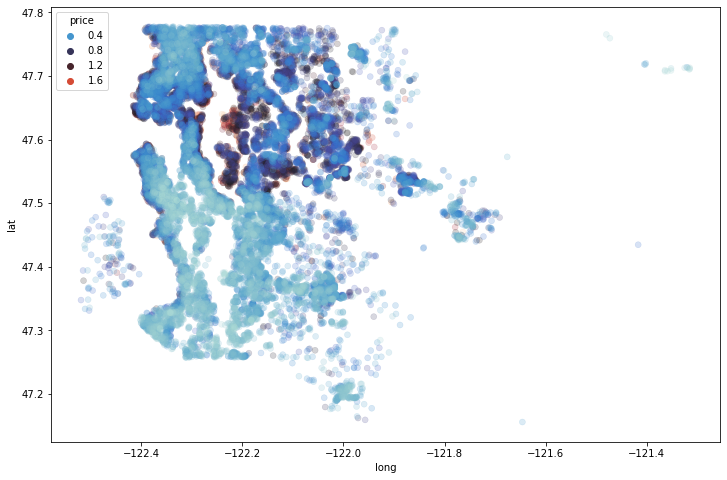

In [20]:
# skrg lebih jelas mana daerah yang mahal
# yg mahal itu lebih ke daerah2 yg deket air, atau yg punya waterfront
# di pinggir2 land nya lebih mahal
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=bottom_99_perc,
                edgecolor=None,alpha=0.2,palette='icefire')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

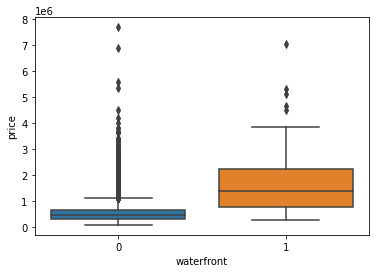

In [21]:
# coba kita plot waterfront
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data
skrg kita mulai feature engineering

In [22]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
# id nya kita ga butuh, boleh kita drop aja
df = df.drop('id',axis=1)

In [25]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

### Feature Engineering from Date

In [26]:
# kita liat datenya
df['date']

# dtypenya object, artinya cuma string

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [27]:
# kita ubah jadi datetime
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [29]:
# skrg kita bisa pisahin month sama yearnya ke column baru
# biar nanti kita bisa liat corr nya sama price

# year
df['year'] = df['date'].apply(lambda date:date.year)

In [30]:
# month
df['month'] = df['date'].apply(lambda date:date.month)

In [31]:
# RECALL LAMBDA
# sama aja kayak isi function ini
def year_extraction(date):
    return date.year

<AxesSubplot:xlabel='year', ylabel='price'>

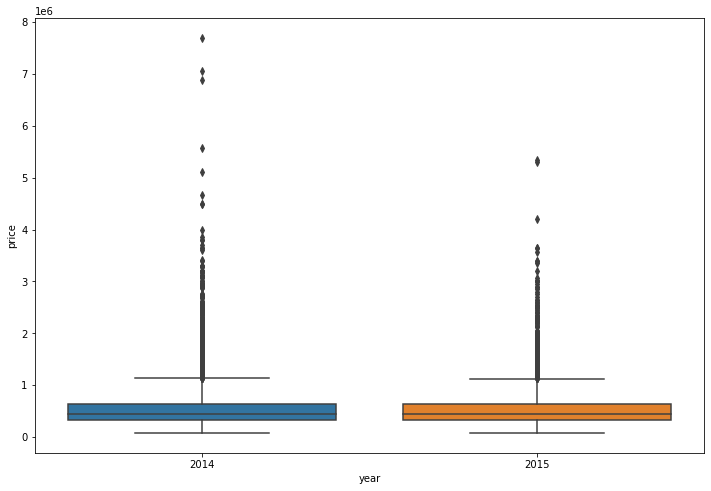

In [32]:
# dari year kurang keliatan
plt.figure(figsize=(12,8))
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

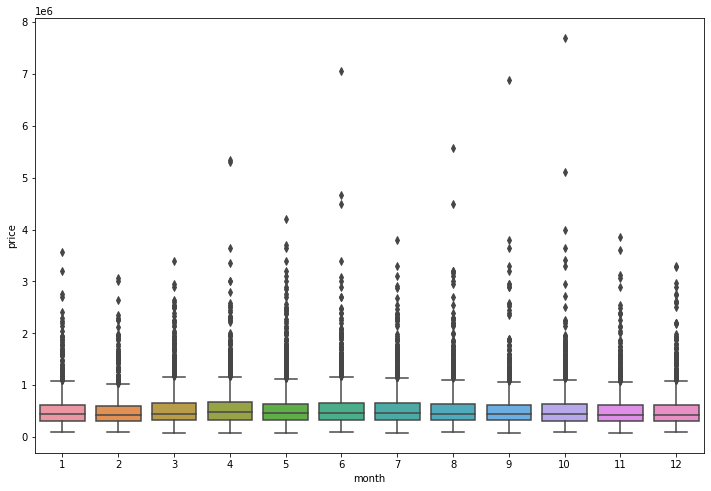

In [33]:
# coba liat dari month
# apa mungkin bulan2 tertentu mahal
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=df)

kalo gini masih ga keliatan jadi kita pake groupby

In [34]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

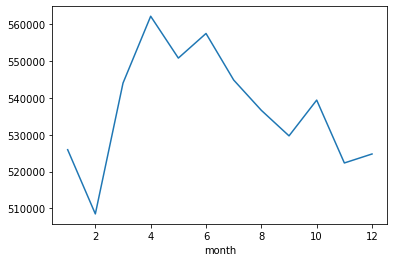

In [35]:
# terus kita plot
df.groupby('month').mean()['price'].plot()

disini keliatan ada behaviour berdasarkan bulannya, tapi range nya ga gitu jauh cuma 510k - 560k

<AxesSubplot:xlabel='year'>

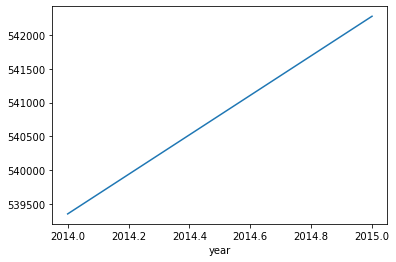

In [36]:
# kita plot juga buat tahunnya
df.groupby('year').mean()['price'].plot()

# harga tahunan wajar makin mahal karena inflasi dll

In [37]:
# kita bisa drop column datenya soalnya udah kita feature engineer, 
# udah di extract bulan sama tahunnya
df = df.drop('date',axis=1)

In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [39]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 21 columns]

In [40]:
# skrg kita cek2 feature nya

In [41]:
# zipcode
# kita coba liat dulu value_counts nya
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

ada 70 zipcode beda, kita musti tentuin kita mau dia sebagai categorical atau continous, jadi kita liat dulu correlation nya sama di peta

### Zipcode
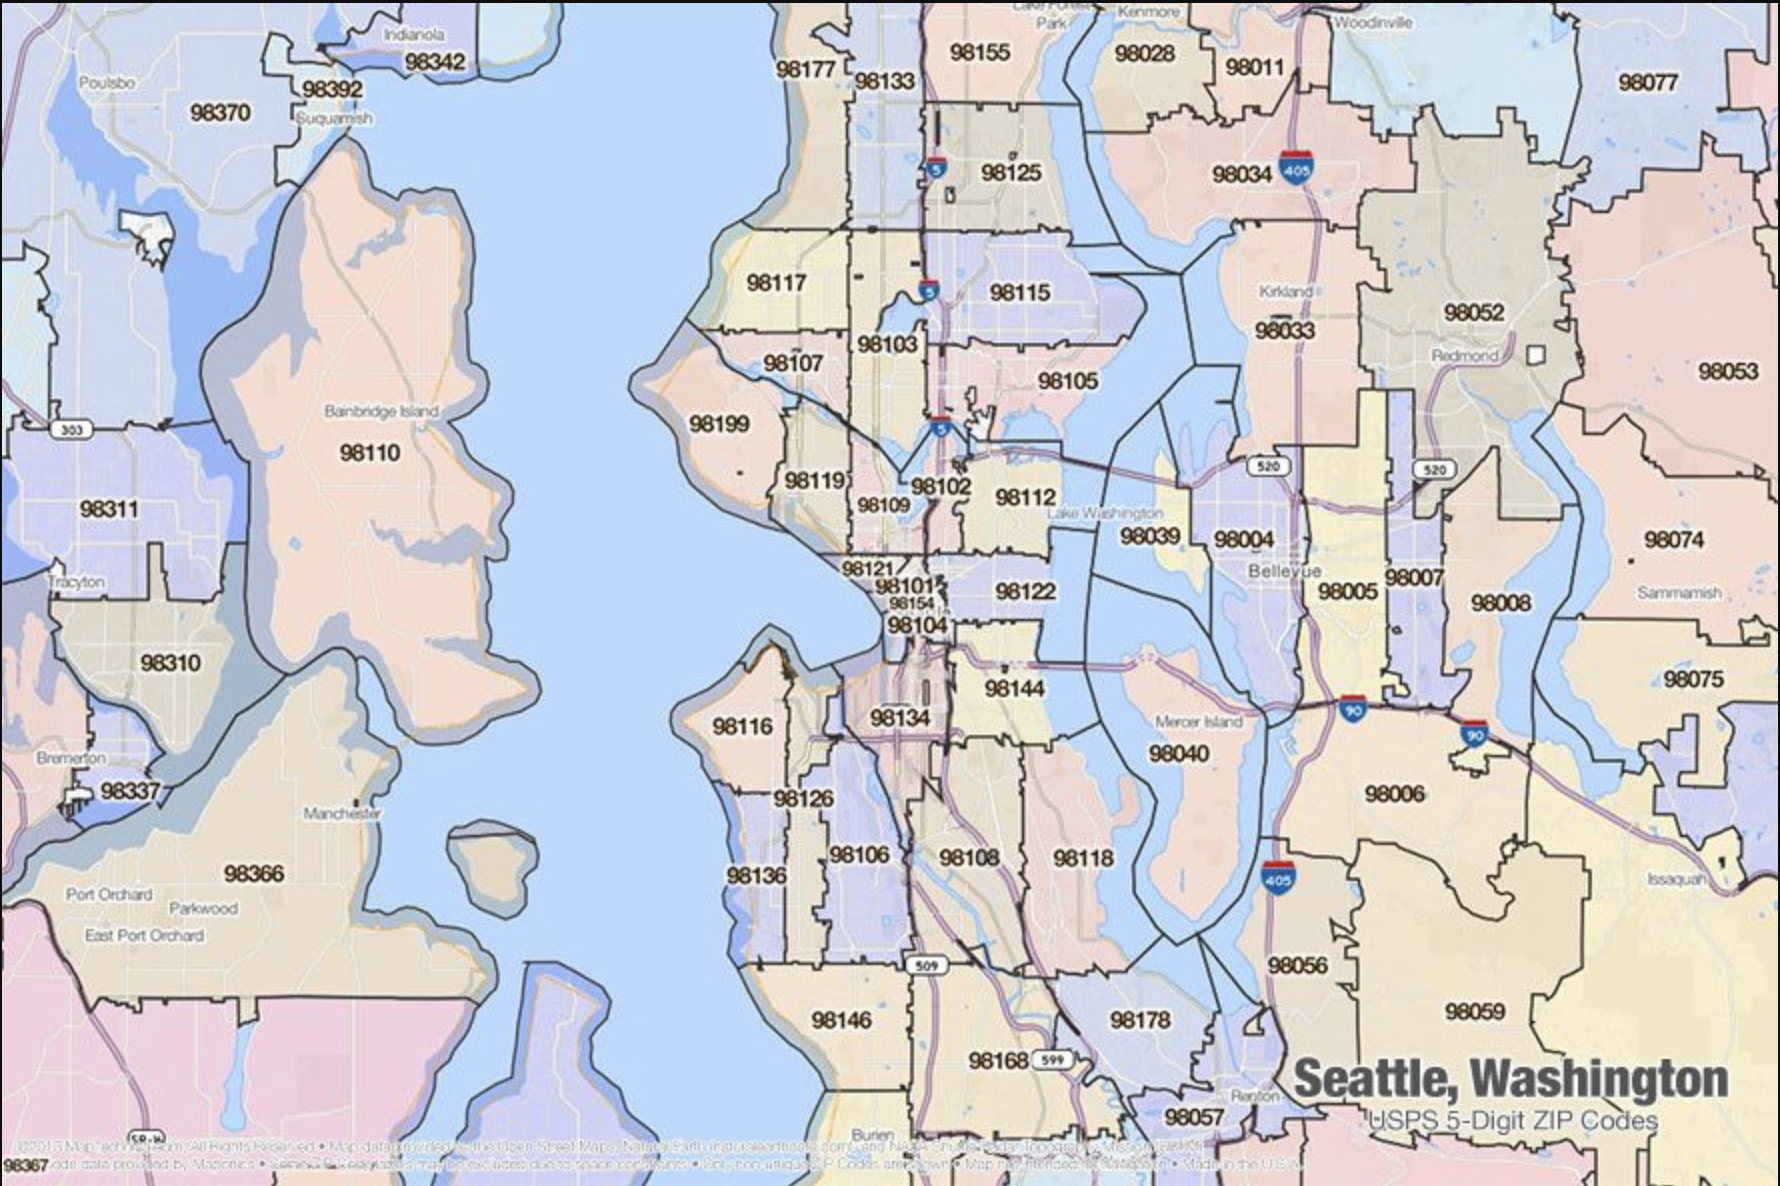


dan ternyata ga ada hubungan continousnya, artinya ga ada misal zipcode lebih gede itu lebih bagus daerahnya, jadi totally random, berarti categorical. TAPI 70 categorical values itu kebanyakan, jadi kalo mau kita bisa bikin categorical berdasarkan daerah bagian, atau misal selatan utara barat timur, cuma butuh kerjaan manual yang lumayan. Jadi itu pentingnya ML engineer contact sama orang yg expert, contohnya real estate agent yg ngerti daerah2 nya. jadi untuk case ini kita drop aja zipcodenya

In [42]:
df = df.drop('zipcode',axis=1)

In [43]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10  
1  47.7210 -122.319           1690        7639  2014     12  
2  47.7379 -122.233           2720        8062  2015      2  
3  47.5208 -122.393           1360        5000  2014     12  
4  47.6168 -122.045           1800        7503  2015      2

In [44]:
# yr_renovated
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

skrg ini kita tentuin lagi mau categorical atau continous, harusnya kita bisa bikin categorical pake dummy variables (0/1), jadi yang '0' itu kan artinya ga direnovasi, yang ada tahunnya berarti udah di renov kita kasih value '1'

cuma kita bisa pake tahunnya sebagai advantage buat kita, soalnya tahun renov nya makin baru berarti valuenya makin besar harusnya, jadi kita mending keep ini sebagai continous value

In [45]:
# sqft_basement
# ini kita treat continous juga, alesannya sama kayak renov
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [46]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train = scaler.fit_transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

In [53]:
X_train.shape

(15117, 19)

In [54]:
X_test.shape

(6480, 19)

In [55]:
df.shape

(21597, 20)

## Creating a Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [57]:
X_train.shape

(15117, 19)

In [58]:
model = Sequential()

# ada 19 features, jadi kita pake 19 units
# layers nya 4 dlu, harusnya bakalan overkill jadi bakal overfit
# cuma nanti di test pake validation data
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-09-15 16:30:05.355158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-15 16:30:05.355500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [59]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400


2022-09-15 16:30:05.486894: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/119 [..............................] - ETA: 50s - loss: 434068324352.0000

2022-09-15 16:30:05.800023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 1s 7ms/step - loss: 430232207360.0000 - val_loss: 418867838976.0000
Epoch 2/400
  1/119 [..............................] - ETA: 0s - loss: 396670992384.0000

2022-09-15 16:30:06.609477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 1s 6ms/step - loss: 428656001024.0000 - val_loss: 413571186688.0000
Epoch 3/400
119/119 [==============================] - 1s 6ms/step - loss: 409171394560.0000 - val_loss: 370286460928.0000
Epoch 4/400
119/119 [==============================] - 1s 6ms/step - loss: 319470010368.0000 - val_loss: 230381846528.0000
Epoch 5/400
119/119 [==============================] - 1s 6ms/step - loss: 163525951488.0000 - val_loss: 105783410688.0000
Epoch 6/400
119/119 [==============================] - 1s 6ms/step - loss: 100734328832.0000 - val_loss: 94877032448.0000
Epoch 7/400
119/119 [==============================] - 1s 6ms/step - loss: 97204584448.0000 - val_loss: 93320544256.0000
Epoch 8/400
119/119 [==============================] - 1s 6ms/step - loss: 95489253376.0000 - val_loss: 91648770048.0000
Epoch 9/400
119/119 [==============================] - 1s 6ms/step - loss: 93766647808.0000 - val_loss: 90060587008.0000
Epoch 10/400
119/119 [=============

In [63]:
# karena kita pake validation data, jadi kita bisa liat loss sama val_loss nya
pd.DataFrame(model.history.history)


loss      val_loss
0    4.302322e+11  4.188678e+11
1    4.286560e+11  4.135712e+11
2    4.091714e+11  3.702865e+11
3    3.194700e+11  2.303818e+11
4    1.635260e+11  1.057834e+11
..            ...           ...
395  2.953757e+10  2.750971e+10
396  2.953625e+10  2.741264e+10
397  2.949194e+10  2.735188e+10
398  2.950240e+10  2.736244e+10
399  2.949858e+10  2.731971e+10

[400 rows x 2 columns]

In [64]:
# kita bisa compare loss training sama loss validation pake plot
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

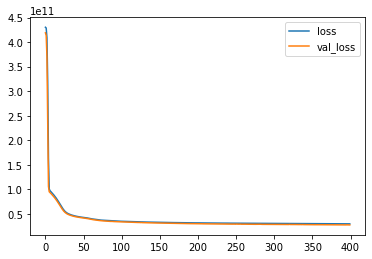

In [65]:
losses.plot()

kita bisa liat makin akhir improvement nya udah makin kecil, berarti 400 epochs ga cukup, masih bisa lanjut training. Cuma kita harus perhatiin juga, kalo misal loss trainingnya tbtb naik jauh bgt, berarti errornya jadi gede bgt itu artinya overfitting, tapi kalo val_loss sama loss nya masih sama, berarti masih bisa lanjut training

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [68]:
pd.DataFrame(X_test)

0     1         2         3    4    5    6     7    8         9   \
0     0.1  0.08  0.042399  0.004695  0.0  0.0  0.0  0.75  0.3  0.054594   
1     0.3  0.36  0.172699  0.005134  0.0  0.0  0.0  0.75  0.5  0.118509   
2     0.2  0.24  0.125129  0.002114  0.0  0.0  0.0  0.75  0.4  0.055925   
3     0.1  0.08  0.057911  0.003550  0.0  0.0  0.0  0.75  0.4  0.074567   
4     0.2  0.16  0.113754  0.005482  0.0  0.0  0.0  0.50  0.4  0.121172   
...   ...   ...       ...       ...  ...  ...  ...   ...  ...       ...   
6475  0.3  0.44  0.314374  0.020849  0.4  0.0  0.0  0.75  0.6  0.279627   
6476  0.2  0.16  0.086867  0.002835  0.0  0.0  0.0  1.00  0.3  0.111851   
6477  0.1  0.08  0.055843  0.002593  0.0  0.0  0.0  0.75  0.4  0.071904   
6478  0.3  0.20  0.222337  0.004046  0.0  0.0  0.5  1.00  0.4  0.118509   
6479  0.3  0.32  0.276112  0.003925  0.4  0.0  0.0  0.50  0.6  0.355526   

            10        11   12        13        14        15        16   17  \
0     0.000000  0.208696  0.0  0.875181  0.181894  0.313371  0.008877  0.0   
1     0.161826  0.643478  0.0  0.820492  0.277409  0.356393  0.009937  0.0   
2     0.163900  0.078261  0.0  0.838025  0.122924  0.163655  0.005471  0.0   
3     0.000000  0.347826  0.0  0.861509  0.164452  0.134400  0.006672  0.0   
4     0.039419  0.356522  0.0  0.880328  0.176910  0.170539  0.010392  1.0   
...        ...       ...  ...       ...       ...       ...       ...  ...   
6475  0.195021  0.800000  0.0  0.487534  0.428571  0.352951  0.044766  1.0   
6476  0.000000  0.600000  0.0  0.330706  0.358804  0.124075  0.005296  1.0   
6477  0.000000  0.200000  0.0  0.639698  0.117940  0.180864  0.005063  0.0   
6478  0.261411  0.478261  0.0  0.526942  0.271595  0.337463  0.007745  1.0   
6479  0.000000  0.878261  0.0  0.703716  0.228405  0.330580  0.019653  0.0   

            18  
0     0.636364  
1     0.818182  
2     0.909091  
3     0.545455  
4     0.272727  
...        ...  
6475  0.272727  
6476  0.090909  
6477  1.000000  
6478  0.090909  
6479  0.454545  

[6480 rows x 19 columns]

In [69]:
# kita coba predict 
predictions = model.predict(X_test)

2022-09-16 16:38:00.872270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [70]:
# skrg kita liat MAE sama RMSE nya
mean_absolute_error(y_test,predictions)


101880.35043282215

In [71]:
np.sqrt(mean_squared_error(y_test,predictions))

165286.7611009637

bagus atau ga? errornya gede atau ga? kita cek df kita

In [74]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [75]:
# mean
5.402966e+05

540296.6

100k itu lumayan jauh dari 540k, off sekitar 20%, ga jelek, ga bagus juga

In [76]:
# skrg kita cek variance scorenya
# max score nya 1.0
explained_variance_score(y_test,predictions)

0.7940434431108307

0.79 sebenernya ga buruk, cuma kita skrg ga ada perbandingan sama model yang lain, jadi gatau bagus atau ga

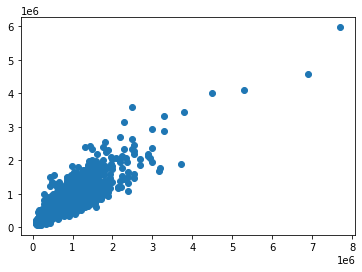

In [77]:
# skrg kita coba plot predictions nya
plt.scatter(y_test,predictions)

# perfect predictions itu harusnya garis lurus linear

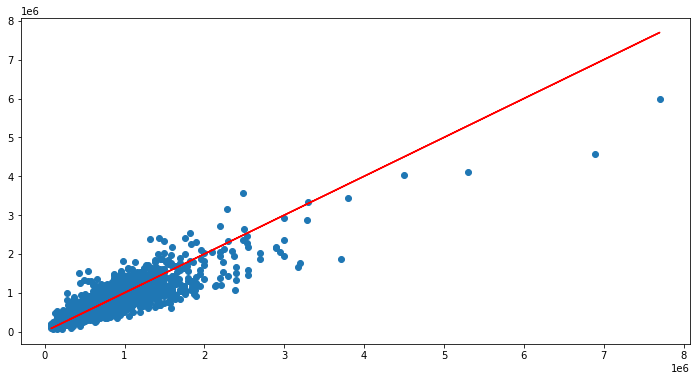

In [81]:
# kita coba plot 2-2nya
plt.figure(figsize=(12,6))

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

bisa kita liat sebenernya untuk harga range 2 million itu prediksinya lumayan bagus, tapi yang mahal2 sama outliers kurang, JADI yang bisa kita lakuin adalah kita engineer lagi datanya, kita drop 1% atas, terus kita lanjut train lg modelnya

In [87]:
y_test.shape

(6480,)

In [88]:
predictions.shape

(6480, 1)

In [89]:
# kita samain shapenya
errors = y_test.reshape(6480,1) - predictions

/Users/clcx/miniforge3/envs/tf-arm64/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

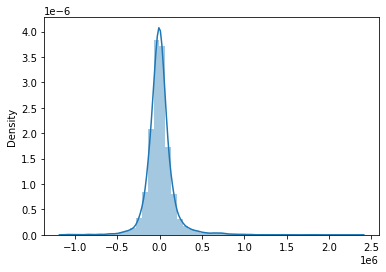

In [90]:
sns.distplot(errors)

### Predicting on a brand new house

In [91]:
# kita coba ambil contoh rumah dari df kita, terus kita drop pricenya
df.head(1)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3        1.0         1180      5650     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10

In [92]:
singe_house = df.drop('price',axis=1).iloc[0]

In [93]:
singe_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [94]:
# kurung kotak nya cuma 1, harusnya 2, jadi kita reshape dlu
singe_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [97]:
singe_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [98]:
# terus kita scale
singe_house = scaler.transform(singe_house.values.reshape(-1,19))

In [99]:
singe_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [100]:
# predict
model.predict(singe_house)

array([[283282.88]], dtype=float32)

In [102]:
df['price'][0]

221900.0

hasil prediksi 283k, aslinya 221k, off lumayan, gabagus ga jelek